In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [6]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [7]:
train.drop_duplicates(inplace=True)

In [8]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

In [9]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=0, inplace=True)

In [10]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Tata,Tata Nexon,21.50,1497.0,108.50,260.00,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Hyundai,Hyundai i20,21.19,1396.0,88.76,219.66,1
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Toyota,Toyota Fortuner,12.55,2982.0,168.50,360.00,2
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Hyundai,Hyundai Verna,17.01,1591.0,121.30,154.90,1
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Volvo,Volvo XC40,18.00,1969.0,190.00,400.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0,Maruti,Maruti A-Star,19.00,998.0,66.10,90.00,1
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,Maruti Wagon,26.60,998.0,58.16,77.00,1
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,Tata,Tata Tigor,20.30,1199.0,84.00,114.00,1
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0,Mahindra,Mahindra Bolero,15.96,2523.0,63.00,180.00,2


In [11]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0,Skoda,Skoda Rapid,14.30,1598.0,103.50,153.00,1
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0,Honda,Honda City,17.80,1497.0,117.30,145.00,1
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,Hyundai,Hyundai Xcent,19.10,1197.0,82.00,114.00,1
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,Mahindra,Mahindra Scorpio,12.05,2179.0,120.00,290.00,1
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0,Ford,Ford Ecosport,21.70,1498.0,98.96,215.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,81.86 bhp,113.75Nm@ 4000rpm,5.0,Hyundai,Hyundai Grand,20.70,1197.0,81.86,113.75,1
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0,Maruti,Maruti Swift,28.40,1248.0,74.02,190.00,2
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,52.8 bhp,85Nm@ 2500rpm,5.0,Tata,Tata Indica,17.88,1396.0,52.80,85.00,2
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0,Hyundai,Hyundai Creta,19.67,1582.0,126.20,259.90,2


In [12]:
test[test.mileage.isna()]

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
22,23,Hyundai Santro Xing XG AT eRLX Euro II,2004,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN,Hyundai,Hyundai Santro,NaN,NaN,NaN,NaN,2
39,40,Fiat Punto 1.3 Emotion,2013,160254,Diesel,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Fiat,Fiat Punto,NaN,NaN,NaN,NaN,2
71,72,Ford Figo Aspire Facelift,2017,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Ford,Ford Figo,NaN,NaN,NaN,NaN,1
121,122,Hyundai Santro GLS I - Euro II,2006,100000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Hyundai,Hyundai Santro,NaN,NaN,NaN,NaN,2
132,133,Hyundai Santro Xing XG AT eRLX Euro II,2006,100000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN,Hyundai,Hyundai Santro,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1919,Maruti Omni E 8 Str STD,2009,140000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Maruti,Maruti Omni,NaN,NaN,NaN,NaN,1
1967,1968,Maruti Swift 1.3 VXi,2006,100000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Maruti,Maruti Swift,NaN,NaN,NaN,NaN,2
1992,1993,Maruti Swift VDI BSIV,2008,90000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,Maruti,Maruti Swift,NaN,NaN,NaN,NaN,3
2011,2012,Tata Indica DLS,2006,77000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Tata,Tata Indica,NaN,NaN,NaN,NaN,1


In [13]:
test[test.mileage.isna()].brand_extend.unique()

array(['Hyundai Santro', 'Fiat Punto', 'Ford Figo', 'Maruti Swift',
       'Toyota Etios', 'Maruti Esteem', 'Maruti Omni', 'Toyota Qualis',
       'Maruti Zen', 'Maruti Estilo', 'Mahindra Jeep', 'Mahindra Marshal',
       'Tata Indica', 'BMW X1', 'Mahindra Xylo'], dtype=object)

In [14]:
train[train.brand_extend.isin(test[test.mileage.isna()].brand_extend.unique())][['selling_price','name', 'brand_extend']]

,selling_price,name,brand_extend
12,550000,Maruti Swift Dzire VDI,Maruti Swift
14,85000,Maruti Swift 1.3 LXI,Maruti Swift
20,229999,Tata Indica Vista Aura Plus 1.3 Quadrajet BS IV,Tata Indica
24,180000,Tata Indica Vista Aura 1.3 Quadrajet (ABS) BS IV,Tata Indica
34,520000,Maruti Swift Dzire Tour LDI,Maruti Swift
...,...,...,...
5968,175000,Tata Indica V2 DLG TC,Tata Indica
5983,651000,Maruti Swift Dzire VDI,Maruti Swift
5986,270000,Maruti Swift Dzire LDi,Maruti Swift
5989,550000,Maruti Swift Dzire VDI,Maruti Swift


<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

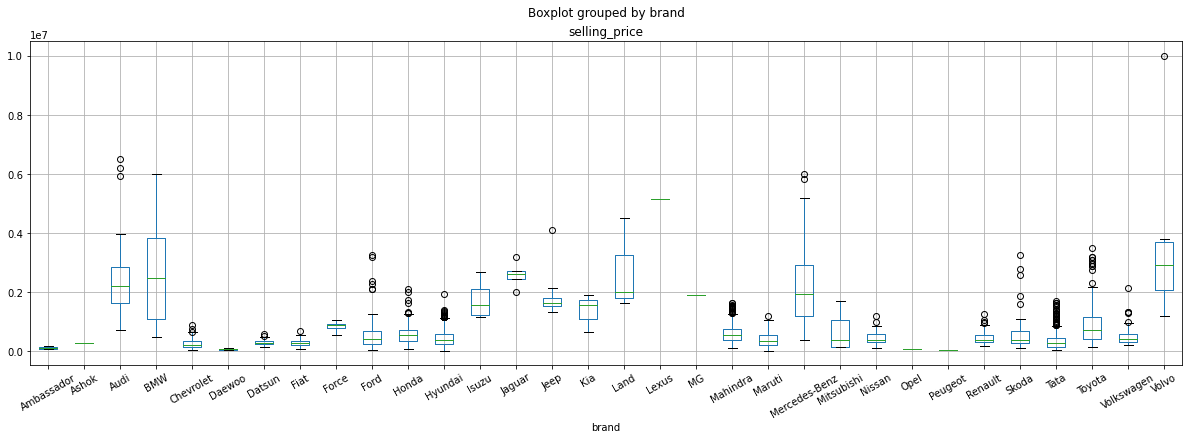

In [15]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [16]:
train[train.brand == 'Hyundai'].selling_price.quantile(0.75) + 1.5*(train[train.brand == 'Hyundai'].selling_price.quantile(0.75) - train[train.brand == 'Hyundai'].selling_price.quantile(0.25))

1125000.0

In [17]:
train[train.brand == 'Tata'].selling_price.quantile(0.75) + 1.5*(train[train.brand == 'Tata'].selling_price.quantile(0.75) - train[train.brand == 'Tata'].selling_price.quantile(0.25))

886500.0

In [18]:
for i in [train, test]:
    i.fillna(0,inplace=True)

In [19]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Tata,Tata Nexon,21.50,1497.0,108.50,260.00,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Hyundai,Hyundai i20,21.19,1396.0,88.76,219.66,1
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Toyota,Toyota Fortuner,12.55,2982.0,168.50,360.00,2
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Hyundai,Hyundai Verna,17.01,1591.0,121.30,154.90,1
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Volvo,Volvo XC40,18.00,1969.0,190.00,400.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0,Maruti,Maruti A-Star,19.00,998.0,66.10,90.00,1
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,Maruti Wagon,26.60,998.0,58.16,77.00,1
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,Tata,Tata Tigor,20.30,1199.0,84.00,114.00,1
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0,Mahindra,Mahindra Bolero,15.96,2523.0,63.00,180.00,2


In [20]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0,Skoda,Skoda Rapid,14.30,1598.0,103.50,153.00,1
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0,Honda,Honda City,17.80,1497.0,117.30,145.00,1
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0,Hyundai,Hyundai Xcent,19.10,1197.0,82.00,114.00,1
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0,Mahindra,Mahindra Scorpio,12.05,2179.0,120.00,290.00,1
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0,Ford,Ford Ecosport,21.70,1498.0,98.96,215.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,81.86 bhp,113.75Nm@ 4000rpm,5.0,Hyundai,Hyundai Grand,20.70,1197.0,81.86,113.75,1
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0,Maruti,Maruti Swift,28.40,1248.0,74.02,190.00,2
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,52.8 bhp,85Nm@ 2500rpm,5.0,Tata,Tata Indica,17.88,1396.0,52.80,85.00,2
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0,Hyundai,Hyundai Creta,19.67,1582.0,126.20,259.90,2


<AxesSubplot:>

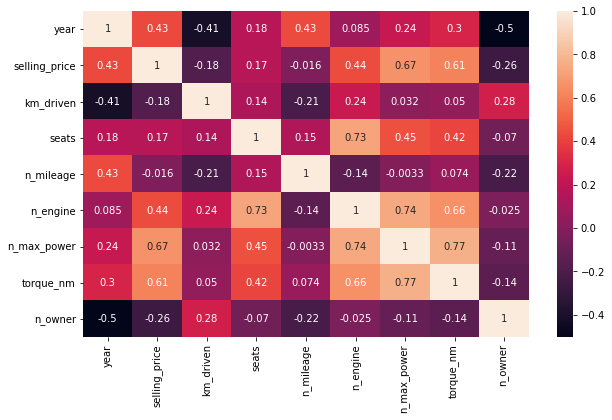

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

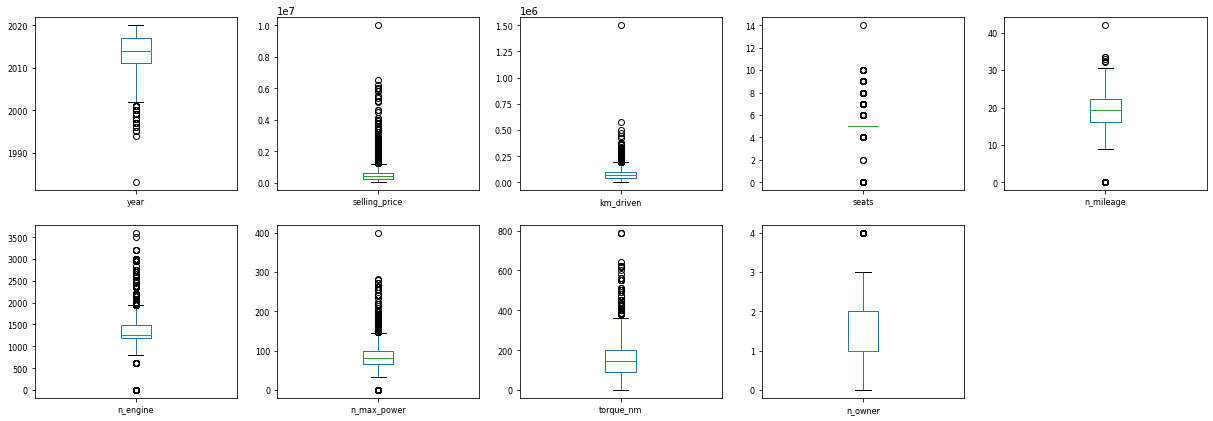

In [22]:
fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

#train = train[train['year'] > 2003]
train = train[train['selling_price'] < 5000000]
train = train[train['km_driven'] < 250000]
train = train[train['n_engine'] < 2400]
train = train[train['n_max_power'] < 190]
train = train[train['torque_nm'] < 400]

In [23]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,brand_extend,n_mileage,n_engine,n_max_power,torque_nm,n_owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,Tata,Tata Nexon,21.50,1497.0,108.50,260.00,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,Hyundai,Hyundai i20,21.19,1396.0,88.76,219.66,1
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,Toyota,Toyota Fortuner,12.55,2982.0,168.50,360.00,2
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,Hyundai,Hyundai Verna,17.01,1591.0,121.30,154.90,1
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,Volvo,Volvo XC40,18.00,1969.0,190.00,400.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0,Maruti,Maruti A-Star,19.00,998.0,66.10,90.00,1
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,Maruti Wagon,26.60,998.0,58.16,77.00,1
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0,Tata,Tata Tigor,20.30,1199.0,84.00,114.00,1
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0,Mahindra,Mahindra Bolero,15.96,2523.0,63.00,180.00,2


# Build model

In [24]:
x = train[['year', 'km_driven', 'seats', 'n_engine', 'n_max_power', 'torque_nm', 'n_owner']]
y = train['selling_price']

In [25]:
x_test = test[['year', 'km_driven', 'seats', 'n_engine', 'n_max_power', 'torque_nm', 'n_owner']]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.3,random_state=21)

In [27]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=16)
random_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=16)

In [28]:
train_pred = random_forest.predict(x_train)
val_pred = random_forest.predict(x_val)

In [29]:
from sklearn import metrics
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('R_squared:', metrics.r2_score(y_train, train_pred))

Train set:
RMSE: 74952.44360150471
MAE: 37933.71995191689
R_squared: 0.9763216407424594


In [30]:
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
print('MAE:', metrics.mean_absolute_error(y_val, val_pred))
print('R_squared:', metrics.r2_score(y_val, val_pred))

Validation set:
RMSE: 186342.71673075744
MAE: 92425.79256130257
R_squared: 0.9076665081496852


In [31]:
test_pred = random_forest.predict(x_test)

In [32]:
submit = sample.copy()

In [33]:
submit.Predicted = test_pred

In [34]:
#submit['Predicted'] = submit['Predicted'].mask(submit['Predicted'] < 3000, submit.Predicted.mean()/2)

In [35]:
submit

,Id,Predicted
0,1,650388.929212
1,2,790704.903784
2,3,393963.123053
3,4,586789.990000
4,5,496556.490307
...,...,...
2123,2124,596649.314741
2124,2125,761367.434592
2125,2126,202273.223468
2126,2127,901341.120418


In [37]:
submit.to_csv(path_or_buf='C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/submit_12_12_1.csv', index=False)